## Filters for Neural Encoding

This notebook discusses the construction of filters for neural encoding via Generalized Linear Models. The basis for the filters consists of raised cosine functions which were introduced in Pillow, et.al., Nature, 2008.

Import scientific modules:

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Import the filters module which contains functions for generating the bases.

In [3]:
import imp
filters = imp.load_source('filters.py', '../code/filters.py')

Create a stimulus filter:

In [4]:
kpeaks = np.array([0,round(20/3.)])
pars_k = {'neye':5,'n':5,'kpeaks':kpeaks,'b':3}
K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = 20)

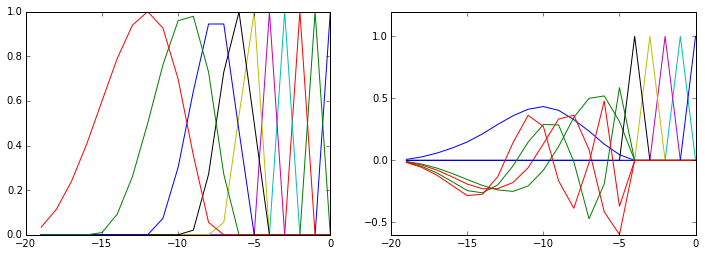

In [5]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(12)
fig1 = axs[0].plot(-kt_domain[::-1],K)
fig2 = axs[1].plot(-kt_domain[::-1],K_orth)

In [6]:
coeff_k = np.array([0.1703926,0.0782157,0.3387306,0.5680452,0.3835860,0.2163205,-0.1528571,0.0069939,-0.0528309,-0.0404678])

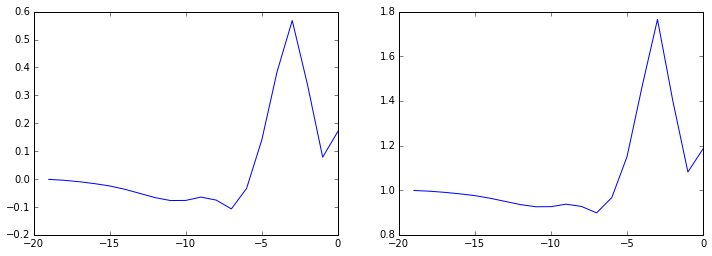

In [7]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(12)
fig1 = axs[0].plot(-kt_domain[::-1],np.dot(K,coeff_k))
fig2 = axs[1].plot(-kt_domain[::-1],np.exp(np.dot(K,coeff_k)))

Create a post-spike filter:

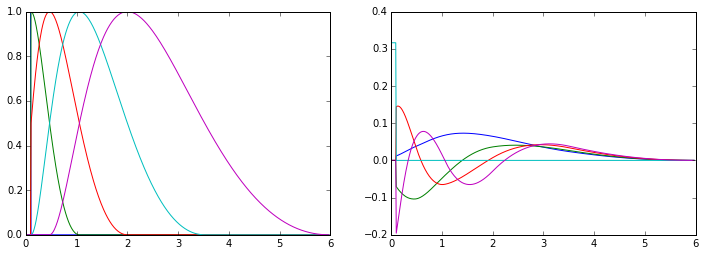

In [9]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(12)
fig1 = axs[0].plot(ht_domain,H)
fig2 = axs[1].plot(ht_domain,H_orth)


In [10]:
coeff_h = np.array([.6,.47,.25,0,0])

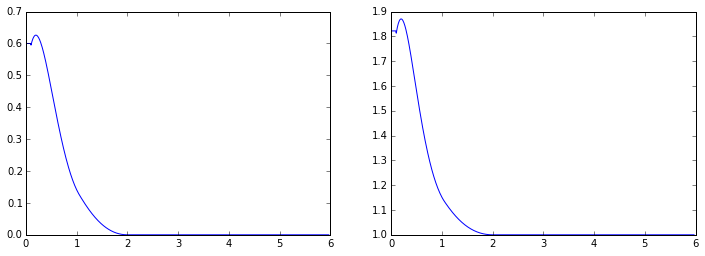

In [11]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(12)
fig1 = axs[0].plot(ht_domain,np.dot(H,coeff_h))
fig2 = axs[1].plot(ht_domain,np.exp(np.dot(H,coeff_h)))

In [12]:
import ipywidgets as widgets
import IPython.display as display

In [121]:
def plotStimFilter(n = 5,b = .5):
    nkt = 20
    kpeaks_min = 0
    kpeaks_max = round(20/7)
    filters = imp.load_source('filters.py', '../code/filters.py')
    kpeaks = np.array([kpeaks_min,kpeaks_max])
    pars_k = {'neye':5,'n':n,'kpeaks':kpeaks,'b':b}
    K,K_orth,kt_domain = filters.createStimulusBasis(pars_k, nkt = nkt)
    
    fig, axs = plt.subplots(1,2)
    fig.set_figwidth(12)
    axs[0].plot(-kt_domain[::-1],K)
    axs[1].plot(-kt_domain[::-1],K_orth)

In [119]:
w_stimFilter = widgets.interactive(plotStimFilter,
                           b = widgets.FloatSlider(min=0,max= 6,step = 1.,value=5),
                           n = widgets.IntSlider(min=2,max=10,value=5)
                           )

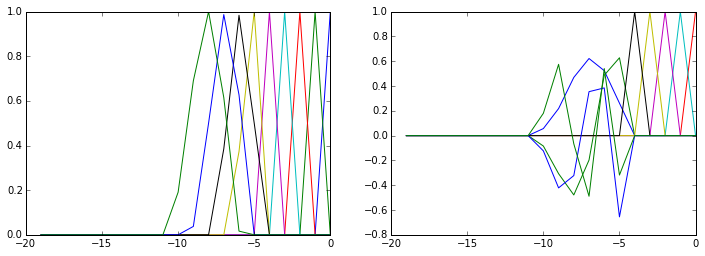

In [120]:
a = display.display(w_stimFilter)

In [66]:
# Note: Widgets do not work for n = 1 and b = 0 !!!!!

In [122]:
def plotPostSpikeFilter(n=5,absref = 0,dt = 0.01,b=0.5):
    hpeaks = np.array([0.1,2])
    pars_h = {'n':n,'hpeaks':hpeaks,'b':b}
    pars_h['absref']=absref
    H,H_orth,ht_domain = filters.createPostSpikeBasis(pars_h,dt)
    
    fig, axs = plt.subplots(1,2)
    fig.set_figwidth(12)
    fig1 = axs[0].plot(ht_domain,np.dot(H,coeff_h))
    fig2 = axs[1].plot(ht_domain,np.exp(np.dot(H,coeff_h)))
    

In [123]:
w_postSpikeFilter = widgets.interactive(plotPostSpikeFilter,
                           n = widgets.IntSlider(min=2,max=10,value=5),
                           absref = widgets.FloatSlider(min = 0,max=1,step = 0.1,value = 0),
                           dt = widgets.FloatSlider(min=0.01,max= 10,step = 0.01,value=0.01),
                           b = widgets.FloatSlider(min=0,max = 10,value = 0.5)
                           )

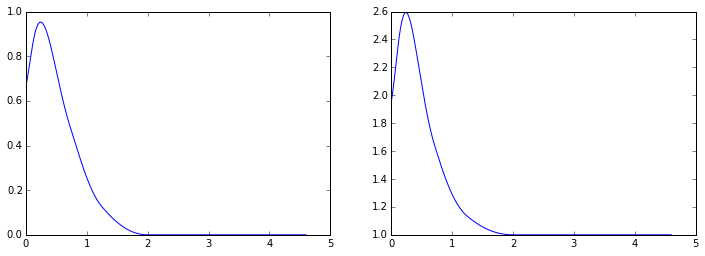

In [124]:
display.display(w_postSpikeFilter)

In [125]:
# scale of widgets changes with values: check if there is an issue

In [126]:
# allow to have random coefficients, random stimulus